In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# author data descriptive statistics

## JASIST

In [57]:
import os
import pandas as pd
import numpy as np

path = os.getcwd()
scientometric_coauthor_path = path+'\\data\\Scientometrics-3\\co-author\\'
scientometric_cooccur_path = path+'\\data\\Scientometrics-3\\co-occurance\\'
jasist_coauthor_path = path+'\\data\\JASIST\\co-author\\'
jasist_cooccur_path = path+'\\data\\JASIST\\co-occurrance\\'

def list_files_paths(files_path):
    files = os.listdir(files_path)
    network_file_paths = []
    mapfile_paths = []
    for file in files:
        print(files_path+file+'\\network.txt')
        print(files_path+file+'\\map.txt')
        network_file_paths.append(files_path+file+'\\network.txt')
        mapfile_paths.append(files_path+file+'\\map.txt')
    return files, network_file_paths, mapfile_paths

def file_transform(file):
    source_list, target_list, weight_list = [], [], []
    with open(file, 'r', encoding='utf-8') as f:
        f = f.read()
        for i, line in enumerate(f.split('\n')):
            for j, ele in enumerate(line.split('\t')):
                if i == 0:
                    ele = ele.replace('\ufeff', '')
                if j == 0:
                    source_list.append(ele)
                elif j== 1:
                    target_list.append(ele)
                elif j == 2:
                    weight_list.append(ele)
    source_list = source_list[:-1]
    weight_list = list(map(int, weight_list))
    return source_list, target_list, weight_list

def to_df(source_list, target_list, weight_list):
    
    df = pd.DataFrame(columns = ['source', 'target', 'weight'])
    df['source'] = source_list
    df['target'] = target_list
    df['weight'] = weight_list

    return df

In [3]:
files, network_file_paths, mapfile_paths = list_files_paths(scientometric_coauthor_path)
# read nodes
df_nodes = []
for f in mapfile_paths:
    df_iter = pd.read_csv(f, sep='\t')
    df_nodes.append(df_iter)
# read edges
df_edges = []
for f in network_file_paths:
    source_list, target_list, weight_list = file_transform(f)
    df_iter = to_df(source_list, target_list, weight_list)
    df_edges.append(df_iter)

print("File number \nnode:{} \t edge:{}".format(len(df_nodes), len(df_edges)))

C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2015\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2015\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2016\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2016\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2017\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2017\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2018\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2018\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-3\co-author\2010-2019\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\Scientometrics-

In [4]:
def generate_label_edge(df_edges, df_nodes):
    df_label_edges = []
    label_edge = pd.DataFrame(columns=['source', 'target', 'weight'])

    for i, df_edge in enumerate(df_edges):
        label_edge_source, label_edge_target = [], []
        label = list(df_nodes[i]['label'])
        for j in df_edge['source']:
            label_edge_source.append(label[int(j)-1])
        for j in df_edge['target']:
            label_edge_target.append(label[int(j)-1])
        label_edge['source'] = label_edge_source
        label_edge['target'] = label_edge_target
        label_edge['weight'] = df_edge['weight']

        df_label_edges.append(label_edge)
        label_edge = pd.DataFrame(columns=['source', 'target', 'weight'])
        
    return df_label_edges
df_label_edges = generate_label_edge(df_edges, df_nodes)

In [5]:
def generate_all_node_id_table(df_nodes):
    all_node_id_table = pd.DataFrame(columns=['id', 'label'])
    for t, df_node in enumerate(df_nodes):
        all_node_id_table = all_node_id_table.append(df_node[['id', 'label']])

    all_node_id_table = all_node_id_table.drop_duplicates(subset='label')
    all_node_id_table['id'] = list(range(1,len(all_node_id_table)+1))
    return all_node_id_table

all_node_id_table = generate_all_node_id_table(df_nodes)

In [14]:
def generate_uniq_id_node_edge(all_label_list, df_label_edges, df_nodes):
    df_nodes_uniq_id = []
    df_edges_uniq_id = []
    
    df_node_uniq_id = pd.DataFrame(columns=['id', 'label'])
    df_edge_uniq_id = pd.DataFrame(columns=['source', 'target', 'weight'])
    for i, df_label_edge in enumerate(df_label_edges):
        source_list = list(df_label_edge['source'])
        target_list = list(df_label_edge['target'])
        node_label_list = list(df_nodes[i]['label'])
        
        source_list_id, target_list_id, node_label_list_id = [], [], []
        
        for source_label in source_list:
            source_list_id.append(all_label_list.index(source_label)+1)
        for target_label in target_list:
            target_list_id.append(all_label_list.index(target_label)+1)
        for node_label in node_label_list:
            node_label_list_id.append(all_label_list.index(node_label)+1)
        
        df_edge_uniq_id['source'] = source_list_id
        df_edge_uniq_id['target'] = target_list_id
        df_edge_uniq_id['weight'] = df_label_edge['weight']
        
        df_node_uniq_id['id'] = node_label_list_id
        df_node_uniq_id['label'] = df_nodes[i]['label']
        
        df_nodes_uniq_id.append(df_node_uniq_id)
        df_edges_uniq_id.append(df_edge_uniq_id)
        
        df_node_uniq_id = pd.DataFrame(columns=['id', 'label'])
        df_edge_uniq_id = pd.DataFrame(columns=['source', 'target', 'weight'])
                
    return df_nodes_uniq_id, df_edges_uniq_id

In [15]:
all_label_list = list(all_node_id_table['label'])
df_nodes_uniq_id, df_edges_uniq_id = generate_uniq_id_node_edge(all_label_list, df_label_edges, df_nodes)

In [24]:
for i, e in enumerate(df_edges_uniq_id):
    print(len(df_nodes_uniq_id[i]), len(e))

2926 4771
3431 5771
3635 6230
3747 6463
3836 6578


In [32]:
df_nodes_uniq_id[1][df_nodes_uniq_id[1]['id']>2926]

,id,label
8,2927,"abdulhayoglu, mehmet ali"
20,2928,"adams, jimi"
22,2929,"afshar, askar safipour"
23,2930,"afzal, muhammad tanvir"
28,2931,"ahamdzadeh, khadijeh"
...,...,...
3401,3541,"zhu, guilong"
3412,3542,"zinilli, antonio"
3413,3543,"zink, eren"
3421,3544,"zou, christopher"


In [40]:
e0 = df_edges_uniq_id[0]
e1 = df_edges_uniq_id[1]

In [50]:
e0.isin()

,source,target,weight
0,1,279,1
1,1,1365,1
2,1,1551,1
3,2,163,1
4,2,842,1
...,...,...,...
4766,2873,2875,4
4767,2874,2875,1
4768,2883,2891,1
4769,2889,2890,1


In [43]:
A = e1['source']<=2926
B = e1['target']<=2926
e1[A&B]

,source,target,weight
0,1,279,1
1,1,1365,1
2,1,1551,1
3,2,163,1
4,2,842,1
...,...,...,...
5766,2873,2875,4
5767,2874,2875,1
5768,2883,2891,1
5769,2889,2890,1


In [90]:
pairs = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
p = pairs[1]
t = files
def find_intersect_node_edge(node_list1, node_list2, df_edge1, df_edge2, t, p):
    n1 = node_list1
    n2 = node_list2
    intersect_n12 = list(set(n1).intersection(set(n2)))
    print('Intersection node numbers: ', len(intersect_n12))

    df1_intersect = df_edge1[df_edge1['source'].isin(intersect_n12) & df_edge1['target'].isin(intersect_n12)==True]
    df2_intersect = df_edge2[df_edge2['source'].isin(intersect_n12) & df_edge2['target'].isin(intersect_n12)==True]
    print('{} \n\t\t before: {} edges, \n\t\t after:  {} edges'.format(t[p[0]], len(df_edge1), len(df1_intersect)))
    print('--'*20)
    print('{} \n\t\t before: {} edges, \n\t\t after:  {} edges'.format(t[p[1]], len(df_edge2), len(df2_intersect)))
    print('\n', '=='*30, '\n')
    
    return intersect_n12, df1_intersect, df2_intersect
intersect_n12, df1_intersect, df2_intersect = find_intersect_node_edge(node_list[p[0]], node_list[p[1]], df_label_edges[p[0]], df_label_edges[p[1]], t, p)

Intersection node numbers:  2812
2010-2015 
		 before: 4771 edges, 
		 after:  4608 edges
----------------------------------------
2010-2016 
		 before: 5771 edges, 
		 after:  4680 edges




In [22]:
def generate_origin_density(node_list, df_edges, df1, t):
    # the number of nodes in node and edge are different
    for i, n in enumerate(node_list):
    #     print(i, '\t', len(n), len(df_nodes[i]), len(df_edges[i]))
        possible_links = (len(n)*(len(n)-1))/2 # (n * (n-1))/2
        sum_weights = df_edges[i]['weight'].astype(int).sum()
        avg_density = sum_weights/possible_links

        df1.at[t[i], 'origin_node'] = int(len(n))
        df1.at[t[i], 'origin_edge'] = int(len(df_edges[i]))
        df1.at[t[i], 'origin_sum_weight'] = sum_weights
        df1.at[t[i], 'origin_possible_links'] = possible_links
        df1.at[t[i], 'origin_avg_density'] = avg_density

In [38]:
# pairs = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
def find_intersect_node_edge(node_list1, node_list2, df_edge1, df_edge2, t, p):
    n1 = node_list1
    n2 = node_list2
    intersect_n12 = list(set(n1).intersection(set(n2)))
    print('Intersection node numbers: ', len(intersect_n12))
    
    e1 = df_edge1
    e2 = df_edge2
    
    df1_intersect = e1[e1['source'].isin(intersect_n12) & e1['target'].isin(intersect_n12)==True]
    df2_intersect = e2[e2['source'].isin(intersect_n12) & e2['target'].isin(intersect_n12)==True]
    print('{} \n\t\t before: {} edges, \n\t\t after:  {} edges'.format(t[p[0]], len(df_edge1), len(df1_intersect)))
    print('--'*20)
    print('{} \n\t\t before: {} edges, \n\t\t after:  {} edges'.format(t[p[1]], len(df_edge2), len(df2_intersect)))
    print('\n', '=='*30, '\n')
    
    return intersect_n12, df1_intersect, df2_intersect

def generate_intersect_density(pairs, node_list, df_edges, df2, t):
    for p in pairs:
        node_list1 = node_list[p[0]]
        node_list2 = node_list[p[1]]
        df_edge1 = df_new_edges[p[0]]
        df_edge2 = df_new_edges[p[1]]
        intersect_n12, df1_intersect, df2_intersect = find_intersect_node_edge(node_list1, node_list2, df_edge1, df_edge2, t, p)

        possible_links = (len(intersect_n12)*(len(intersect_n12)-1))/2 # (n * (n-1))/2
        sum_weights = df2_intersect['weight'].astype(int).sum()
        print('Possible Links: {}, \nSum Weights:{}'.format(possible_links, sum_weights))
        avg_density = sum_weights/possible_links    

        df2.at[t[p[1]], 'intersect_node'] = len(intersect_n12)
        df2.at[t[p[1]], 'intersect_edge'] = len(df2_intersect)
        df2.at[t[p[1]], 'intersect_sum_weight'] = sum_weights
        df2.at[t[p[1]], 'intersect_possible_links'] = possible_links
        df2.at[t[p[1]], 'intersect_avg_density'] = avg_density

In [60]:
# t = scient_files
# pairs = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
# p = pairs[1]

# node_list1, node_list2 = node_list_scient[p[0]], node_list_scient[p[1]]
# df_edge1, df_edge2 = df_edges_scient[p[0]], df_edges_scient[p[1]]
# intersect_n12, df1_intersect, df2_intersect = find_intersect_node_edge(node_list1, node_list2, df_edge1, df_edge2, t, p)

# df_edge2['weight'] = df_edge2['weight'].astype(int)
# df_edge2.sort_values(by='weight', ascending=False).sum()

In [61]:
def main(f_path):
    files, network_file_paths, mapfile_paths = list_files_paths(f_path)
    # read nodes
    df_nodes = []
    for f in mapfile_paths:
        df_iter = pd.read_csv(f, sep='\t')
        df_nodes.append(df_iter)
    # read edges
    df_edges = []
    for f in network_file_paths:
        source_list, target_list, weight_list = file_transform(f)
        df_iter = to_df(source_list, target_list, weight_list)
        df_edges.append(df_iter)
    
    print("File number \nnode:{} \t edge:{}".format(len(df_nodes), len(df_edges)))
    
    # generate node list from edge
    node_list = []
    for df in df_nodes:
        # nodes = generate_node(df)
        nodes = list(map(str, list(df['id'])))
        node_list.append(nodes)
        
    if input("JASIST or SCIENTOMETRICS") == 'JASIST':
        t = []
        for f in files:
            t.append(f.split('_')[1])
    else:
        t = files

    df1 = pd.DataFrame(data=np.zeros((5,5)), columns = ['origin_node', 'origin_edge', 'origin_sum_weight', 'origin_possible_links', 'origin_avg_density'])
    df1.index=t
    generate_origin_density(node_list, df_edges, df1, t)
    
    df2 = pd.DataFrame(data=np.zeros((5,5)), columns = ['intersect_node', 'intersect_edge', 'intersect_sum_weight', 'intersect_possible_links', 'intersect_avg_density'])
    df2.index=t
    df2 = df2.join(df1)
    
    pairs = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
    generate_intersect_density(pairs, node_list, df_new_edges, df2, t)
    
    return files, network_file_paths, mapfile_paths, df_nodes, df_edges, node_list, df1, df2

In [62]:
jasist_files, jasist_network_file_paths, jasist_mapfile_paths, df_nodes_jasist, df_edges_jasist, node_list_jasist, df1_jasist, df2_jasist = main(jasist_coauthor_path)
scient_files, scient_network_file_paths, scient_mapfile_paths, df_nodes_scient, df_edges_scient, node_list_scient, df1_scient, df2_scient = main(scientometric_coauthor_path)

C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2015\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2015\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2016\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2016\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2017\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2017\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2018\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2018\map.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2019\network.txt
C:\Users\Liser\Desktop\linchengwei_link_prediction\data\JASIST\co-author\jasist_2010-2019\map.txt


In [67]:
df2_scient

,intersect_node,intersect_edge,intersect_sum_weight,intersect_possible_links,intersect_avg_density,origin_node,origin_edge,origin_sum_weight,origin_possible_links,origin_avg_density
2010-2015,2926.0,4771.0,5710.0,4279275.0,0.001334,2926.0,4771.0,5710.0,4279275.0,0.001334
2010-2016,2926.0,4187.0,4975.0,4279275.0,0.001163,3431.0,5771.0,6904.0,5884165.0,0.001173
2010-2017,2926.0,3992.0,4675.0,4279275.0,0.001092,3635.0,6230.0,7300.0,6604795.0,0.001105
2010-2018,2926.0,3869.0,4466.0,4279275.0,0.001044,3747.0,6463.0,7488.0,7018131.0,0.001067
2010-2019,2926.0,3784.0,4336.0,4279275.0,0.001013,3836.0,6578.0,7573.0,7355530.0,0.001030


## plot

JASIST or SCIENTOMETRICS?JASIST_revised


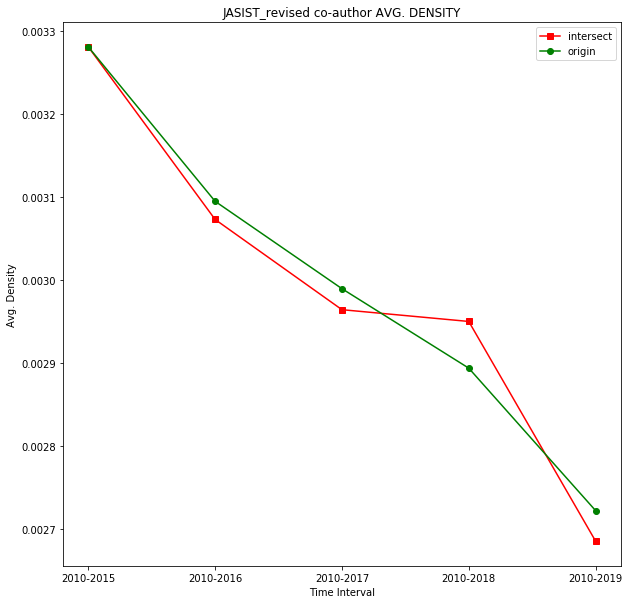

JASIST or SCIENTOMETRICS?SCIENT_revised


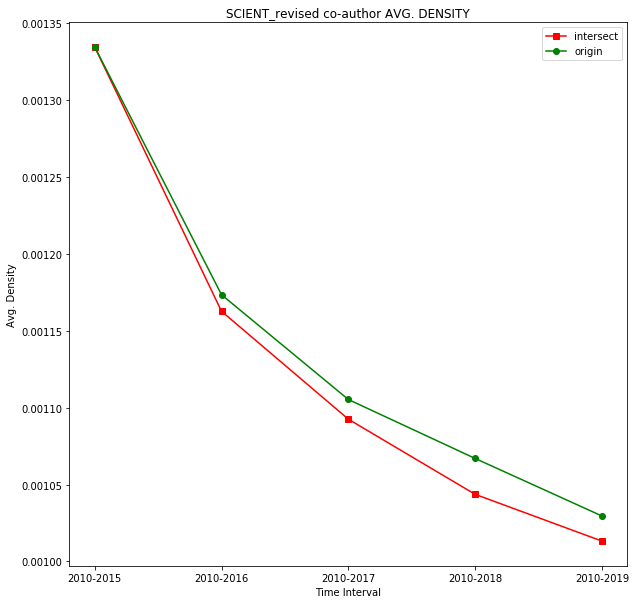

In [16]:
import matplotlib.pyplot as plt
def plot_density(df2):
    title=input('JASIST or SCIENTOMETRICS?')
    plt.figure(figsize=(10, 10))
    plt.plot(df2['intersect_avg_density'], 's-', color = 'r', label="intersect")
    plt.plot(df2['origin_avg_density'], 'o-',color = 'g', label="origin")
    plt.legend(loc = "best", fontsize=10)
    plt.title('{} co-author AVG. DENSITY'.format(title))
    plt.xlabel('Time Interval')
    plt.ylabel('Avg. Density')
    fig = plt.gcf()
    fig.savefig(os.getcwd()+'\\output figure\\{} co-author AVG. DENSITY.png'.format(title))
    plt.show()
plot_density(df2_jasist)
plot_density(df2_scient)

## Generate .net file

    *network Informetrics1990-2004
    *vertices 632
    632 "Shailendra, K"
    *edges
    1 402 1

In [41]:
def generate_netfiles(files, df_nodes, df_edges, node_list):
    netfile_names = []
    file_name_pref = input('INPUT FILE NAME PREFIX:\t') # scientometrics_coauthor_, JASIST_coauthor_
    for file in files:

        #print("{}".format(file_name_pref)+file)
        netfile_names.append("{}".format(file_name_pref)+file)

    # scientometric_data_2010-2014
    for file_index, netfile_name in enumerate(netfile_names):
        f = open(os.getcwd()+"\\output\\netfiles\\origin\\{}.net".format(netfile_name), "w", encoding='utf-8')
        f.write("*{}\n".format(netfile_name))

        f.write("*vertices {}\n".format(len(node_list[file_index])))
        df_node = df_nodes[file_index]
        for i in range(len(node_list[file_index])):
            label = df_node[df_node['id']==int(node_list[file_index][i])]['label'].values[0]
            f.write('{} "{}"\n'.format(node_list[file_index][i], label))
    #     print("node written")
        f.write('*edges\n')
        for i in range(len(df_edges[file_index])):
            source = int(df_edges[file_index].loc[i][0])
            target = int(df_edges[file_index].loc[i][1])
            weight = int(df_edges[file_index].loc[i][2])
            f.write("{} {} {}\n".format(source, target, weight))
        f.close()
        print('--'*15, netfile_name, '--'*15)
        
generate_netfiles(jasist_files, df_nodes_jasist, df_edges_jasist, node_list_jasist)
generate_netfiles(scient_files, df_nodes_scient, df_edges_scient, node_list_scient)

INPUT FILE NAME PREFIX:	JASIST
------------------------------ JASISTjasist_2010-2015 ------------------------------
------------------------------ JASISTjasist_2010-2016 ------------------------------
------------------------------ JASISTjasist_2010-2017 ------------------------------
------------------------------ JASISTjasist_2010-2018 ------------------------------
------------------------------ JASISTjasist_2010-2019 ------------------------------
INPUT FILE NAME PREFIX:	SCIENT
------------------------------ SCIENT2010-2015 ------------------------------
------------------------------ SCIENT2010-2016 ------------------------------
------------------------------ SCIENT2010-2017 ------------------------------
------------------------------ SCIENT2010-2018 ------------------------------
------------------------------ SCIENT2010-2019 ------------------------------


In [62]:
len(df_nodes_jasist[0])

920

In [63]:
len(df_nodes_scient[0])

2926

In [56]:
# t = scient_files
# pairs = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]
# p = pairs[4]

# node_list1, node_list2, df_edge1, df_edge2 = node_list_scient[p[0]], node_list_scient[p[1]], df_edges_scient[p[0]], df_edges_scient[p[1]]

# intersect_n12, df1_intersect, df2_intersect = find_intersect_node_edge(node_list1, node_list2, df_edge1, df_edge2, t, p)

In [57]:
path = os.getcwd()
scientometric_coauthor_path = path+'\\data\\Scientometrics-3\\co-author\\'
scientometric_cooccur_path = path+'\\data\\Scientometrics-3\\co-occurance\\'
jasist_coauthor_path = path+'\\data\\JASIST\\co-author\\'
jasist_cooccur_path = path+'\\data\\JASIST\\co-occurrance\\'

### gml file
    graph
    [
      node
      [
        id 1
        label "" 
        ..
        ..
      ]
      edge
      [
        source 1
        target 2
        value 1
      ]
    ]